# LetsGrowMoreVIP - Data Science Internship

## Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

### by - shivam laxman sonawaane

1) Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

2) Loading the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
#first five rows of the dataset
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
#last five rows of the dataset
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


3) Sorting the dataset according to the date

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


4) Index is not in order,Making it in order

In [6]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


5) Plotting the graph of stocks at Close

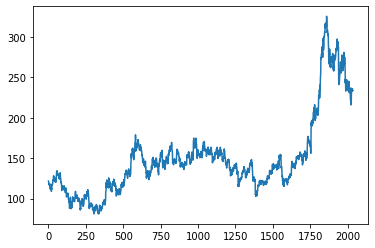

In [7]:
plt.plot(df['Close'])

In [8]:
df1 = df['Close']

6) Feature Scaling

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

7) Splitting the data into training and test sets

In [10]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]
training_size, test_size

(1424, 611)

8) convert an array of values into a dataset matrix

In [11]:
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

9)Reshape input which is required for LSTM

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

10) building the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 7s 180ms/step - loss: 0.0087 - val_loss: 0.0017
Epoch 2/60
19/19 [==============================] - 2s 109ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 2s 108ms/step - loss: 9.1717e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 115ms/step - loss: 8.4118e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 2s 111ms/step - loss: 8.3032e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 2s 112ms/step - loss: 7.8949e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 2s 106ms/step - loss: 7.8347e-04 - val_loss: 9.9055e-04
Epoch 8/60
19/19 [==============================] - 2s 107ms/step - loss: 7.4361e-04 - val_loss: 9.6970e-04
Epoch 9/60
19/19 [==============================] - 2s 106ms/step - loss: 7.1919e-04 - val_loss: 9.8408e-04
Epoch 10/60
19/19 [==============================] - 2s 109m

10) Prediction of scaled test set

In [21]:
test_predict = model.predict(X_test)

11) transform to original test set

In [22]:
test_predict1 = scaler.inverse_transform(test_predict)
test_predict1

array([[143.43193 ],
       [143.70628 ],
       [143.02399 ],
       [140.70056 ],
       [138.86038 ],
       [137.93857 ],
       [138.6357  ],
       [140.05293 ],
       [140.7686  ],
       [140.76987 ],
       [140.64592 ],
       [141.56148 ],
       [142.3137  ],
       [143.7457  ],
       [145.82542 ],
       [144.59306 ],
       [142.43979 ],
       [141.59492 ],
       [141.75021 ],
       [145.82977 ],
       [150.2857  ],
       [153.21642 ],
       [154.31354 ],
       [152.81883 ],
       [152.19118 ],
       [151.58533 ],
       [151.65901 ],
       [153.05215 ],
       [153.99744 ],
       [154.32278 ],
       [154.78716 ],
       [153.91019 ],
       [151.0485  ],
       [145.77225 ],
       [141.86563 ],
       [140.13554 ],
       [139.8775  ],
       [139.30449 ],
       [137.55003 ],
       [134.39838 ],
       [131.75757 ],
       [130.1276  ],
       [128.00807 ],
       [126.88538 ],
       [124.99796 ],
       [122.569565],
       [121.478386],
       [120.8

12) Performance Metrics

In [23]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) 

0.026039706657280465

# MSE Is low